In [378]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin 
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import confusion_matrix

# Comparison of Classifiers for Student Performance Prediction
The objective in this assignment is to compare the performance of different classifiers on the Student Performance dataset. What is the best algorithm for the dataset? 

In [250]:
student_data = pd.read_csv('data/data.csv',sep=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Introduction:
In this project, I will analyze a dataset to predict whether a student will drop out, graduate, or remain enrolled in their studies. The goal is to explore the relationships between various aspects of students' academic and personal lives and the target variable, which indicates whether the student dropped out. By creating a model trained on this data, we can predict whether a student is likely to drop out, provide timely support, and ultimately help reduce dropout rates in higher education. This dataset comes from a higher education institution with a large number of enrolled students and a diverse range of degree programs.
  
features: The dataset contains 36 features, including a mix of continuous and encoded categorical integer values. These features capture various aspects of the students' experiences, such as the program they are enrolled in, their academic performance, and details about their personal lives and family background. Some features, such as academic performance, may be more influential in predicting student outcomes, while others, like family background, may offer additional insights into potential dropout risks.
  
The target variable is multiclass, with three possible outcomes: 'dropout', 'enrolled', and 'graduate'
  
From the UCI link where this data is from it looks like they already have performed some preprocessing of the data: removed unexplainable outliers, missing values and anomolies. so we don't have to think about this. The categorical values in the features are already encoded.
  
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
  
The steps I will follow to identify the best model include:
        1. Analyzing dataset:  Gain a deeper understanding of the characteristics of the features and the target variable.  
        2. preprocessing of data: Create alternative datasets based on the insights gained from the analysis  
        3. Splitting the data: Dividing the dataset into training, validation, and testing sets  
        4. Hyperparameter Tuning: I will be using nested grid search to find the best parameters for each model  
        5. Model evaluation: evaluating using accuracy, precision, recall, the f-measure and roc-auc to conclude which is the best model.  
   
By following these steps, we can gain valuable insights into the dataset, refine it for modeling, and ultimately identify which model performs better. This process will not only help understand the relationships between the features and the target variable but also provide a reliable model for predicting student performance.

# encoding the target
makes it easier to use explorary functions on the whole dataset

In [251]:
label_encoder = LabelEncoder()

student_data['Target'] = label_encoder.fit_transform(student_data['Target'])

student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# exploratory analysis of the dataset

first we can look at the distribution of the values in the features and target.

# feature distribution
The feature distribution is mixed, with some features being normally distributed and others being binary. Testing both Naive Bayes and Bernoulli Naive Bayes models could be a smart approach, as each is suited to different types of data. Additionally, a combined model may provide better performance by leveraging the strengths of both. Decision trees are also a good choice, as they perform well with both normally distributed and binary data. Upon further analysis of the distribution, it is evident that normalizing and scaling the data could be beneficial, as the feature values span different ranges.


array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


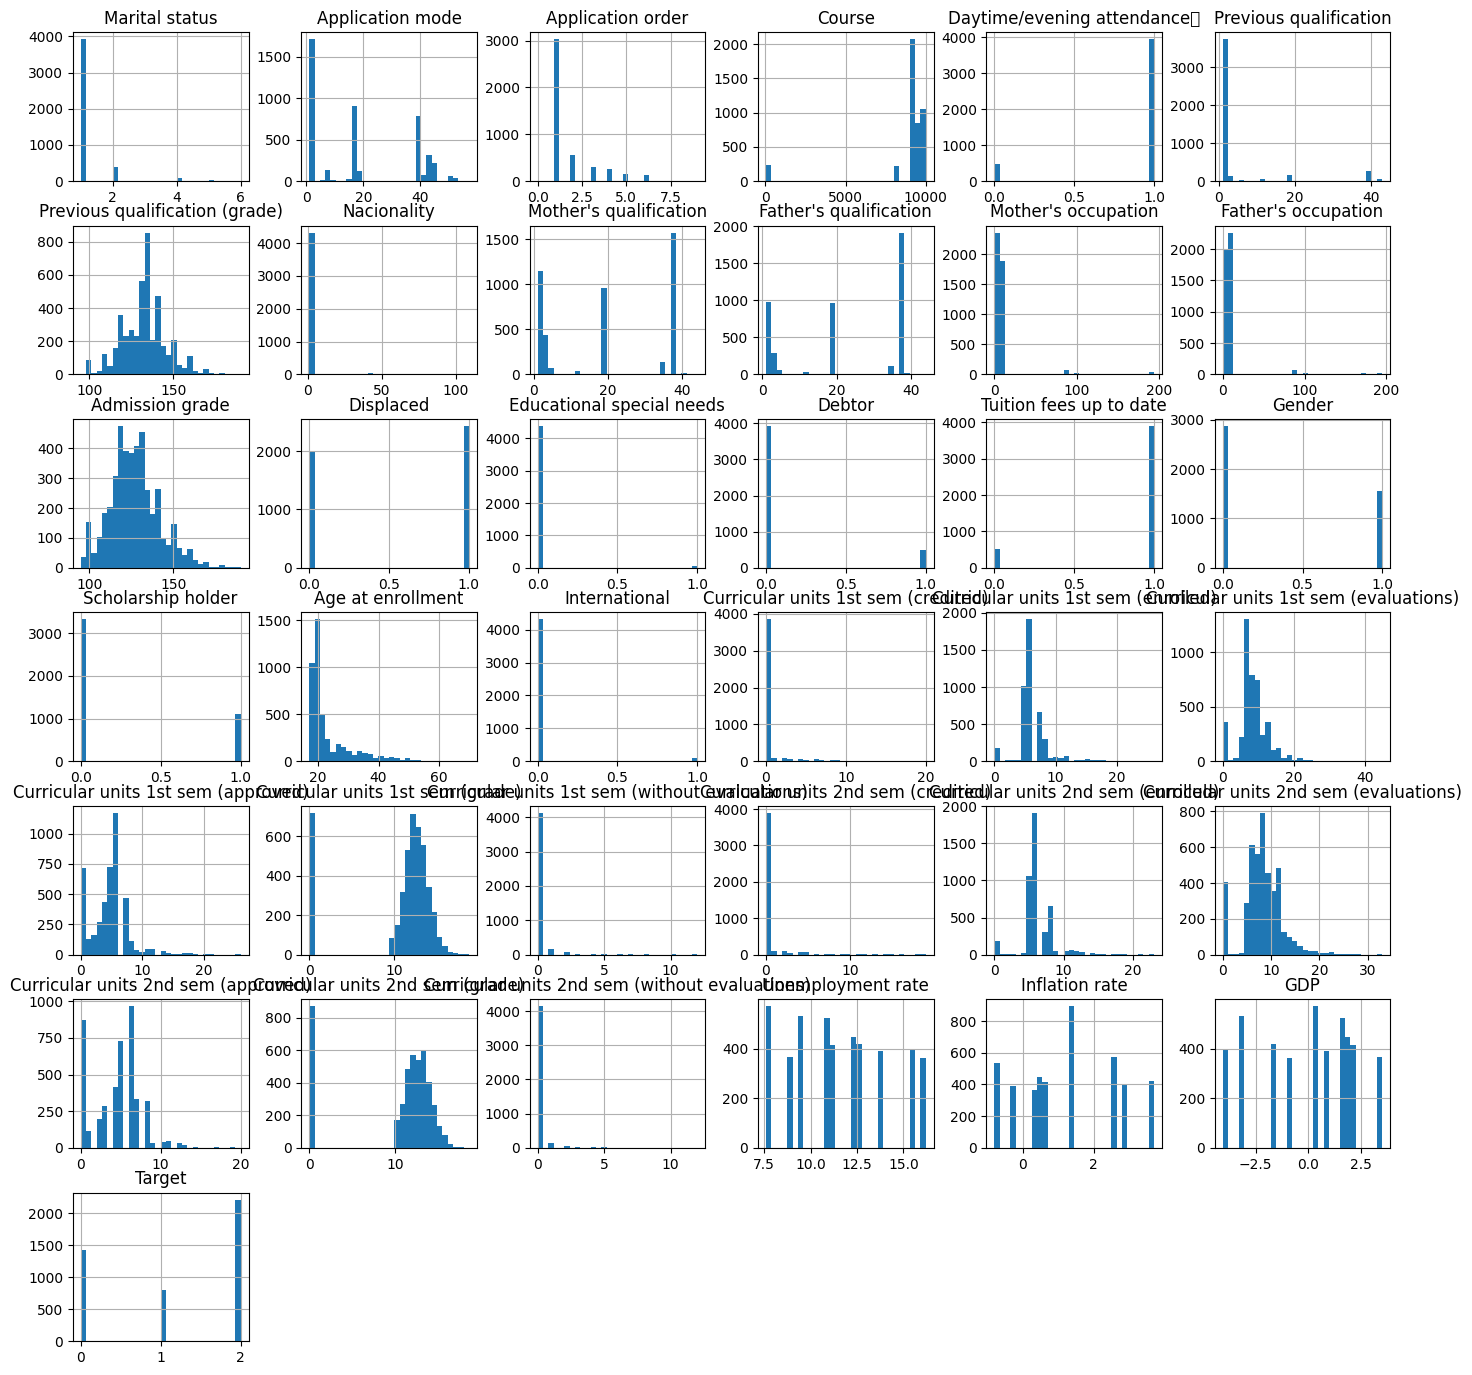

In [252]:
student_data.hist(bins=30, figsize=(17, 17))

# target distribution
target: There is some imbalance here, but there is still enough representation of all categories. I can try to balance the target to see if it makes a difference.


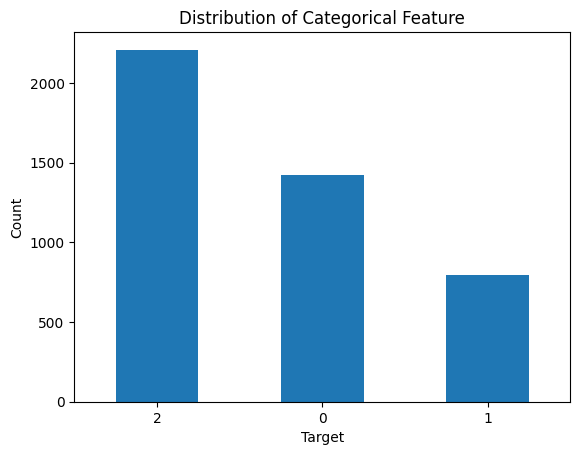

In [253]:
student_data['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Correlation analysis

Analyzing the correlations between the variables reveals that some exhibit very high correlation. The key correlations to consider are:  
    -International and Nationality  
    -Mother's occupation and Father's occupation  
    -All columns related to Curricular Units 1st Semester and Curricular Units 2nd Semester,   which show a degree of interrelation.  
  
These correlations should be carefully examined and addressed during the modeling process to avoid multicollinearity issues and ensure meaningful feature contributions.

In [254]:
student_corr = student_data.corr()
student_corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.0215

# pre-processing of data after exploratory analysis:
i will be using pipelines to optimize the transformation of the dataset. Every change i make will be put in the pipe.

# Scaling the data
Scaling the data is beneficial because it ensures that all features are within a consistent, smaller range, and are on an equal footing in terms of scale. This way, features with larger numerical values won't dominate the learning process, allowing the model to treat all features with equal importance.

In [255]:
scaler = StandardScaler()

# dimention reduction for the correlated columns
we will be using feature engineering to merge the columns with high correlation together by using PCA.
this will be benefitial for the dataset because we can reduce the dimentionality without losing on important information. This will make it easier for the models to work with the data and to capture all the important information from the dataset

In [256]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [257]:
pca = ColumnTransformer([
     ("pca1", PCA(1), [7, 20]),        # international and nationality
     ("pca2", PCA(1), [10, 11]),       # mother and fathers occupation
     ("pca3", PCA(1), [21, 27]),       # Curricular units 1st sem matching with their corresponding Curricular units 2nd sem
     ("pca4", PCA(1), [22, 28]),
     ("pca5", PCA(1), [23, 29]),
     ("pca6", PCA(1), [24, 30]),
     ("pca7", PCA(1), [25, 31]),
     ("pca8", PCA(1), [26, 32])
     ], remainder='passthrough')   # keeping the unchanged columns

# Comebine everything in the pipe
this will make it easier to test on the untuched and altered data, because the alterations only involve the pipe. I will use the function below to create a model with the altered data that also can be used like a regular model in my grid search function

In [ ]:
# scaling data and dimention reduction
def pipe_normalized_pca(model):
    return Pipeline([('scaler', scaler), ('pca', pca), ('classifier', model)])


# scaling data, balancing target, dimention reduction
def pipe_normalized_pca_balanced(model):
    return imbpipeline(steps=[
    ('scaler', scaler),
    ('smote', SMOTE()),
    ('pca', pca),
    ('classifier', model)
])

# spliting the data:
I am splitting the data into training-validation and test. The trai_val data will make up 80% of the dataset, while the test data will account for 20%. Since I will be using grid search, the training data will be further divided into training and validation sets at different stages during the grid search process. Once we identify the best model, we can be confident that it is based on the entire training dataset, which helps reduce the risk of overfitting. The train_val data should be the largest section because it needs to be substantial enough to provide sufficient data for training the model, while also allowing for a validation section to monitor the model's progress during training. This is why 80% of the total data is allocated to the train_val set. The test data should also be large enough to effectively evaluate how the model performs on unseen data. Therefore, allocating 20% of the total dataset for testing is typically sufficient.  
  
how the train_val data will be split in nested grid search:  
outer loop(5-cross validation folds):   
    - 80% of the entire dataset is split into five sections  
    - 4/5 (80%) of the train_val data is used for the grid search  
    - 1/5 (20%) of the train_val data is used to evaluate the best model returned from the grid search. which will be unseen data and not used to train the model in the inner loop
inner loop(4-corss validation folds):   
    -In the inner loop, 64% of the entire dataset (which is 80% of the train_val data) is used  for hyperparameter tuning and cross-validation within the grid search process  
    - 3/4 (75%) of the 64% data is used for training the model.
    - 1/4 (25%) of the 64% data is used for validation during the grid search, helping to tune the hyperparameters.  
Since cross-validation is used, the data in the inner and outer loops will be rotated. Each section will be used for both training and validation in different rounds. 

In [259]:
features = student_data.drop('Target', axis=1)
targets = student_data['Target']

train_val_features, test_features, train_val_targets, test_targets = train_test_split(features, targets, test_size=0.2)

# hyperparameter tuning to find the best possible classifiers
i will be using nested cross validation for each algortihm that i am going to test, to make sure that i got the best combination of parameters. to evaluate during the tuning process i will be looking at accuracy, precision, recall, the f-measure and roc auc.

i will be first trying singular models, an ensembeled model and a combination to see if a combination of models can give me a better result. 

i wil also be testing on the untuched data to see if the preprocessing made the data better better or not.

i will do the training process over two rounds, so i can test five models with few parameters. then i will test the two best models from round one again with more parameters, to make sure i got the best model. This dataset has a lot more data, so it will be more effective to test more models at the beginning with fewer parameters, then go in depth with the best ones.

# method to evaluate the models
When evaluating the models, it’s important to focus on correctly predicting all three outcomes—dropout, graduate, or continue in school. The F1 score is key since it balances precision and recall. We’ll also look at the ROC AUC score to see how well the model separates the classes overall. These two metrics will guide us during grid search and final evaluation to make sure the model does a good job across all categories.


In [260]:

def evaluate(estimator, X, y):
    probabilities = estimator.predict_proba(X)
    prediction_indices = np.argmax(probabilities, axis=1)
    predictions = estimator.classes_.take(prediction_indices, axis=0)

    return {
        'accuracy': accuracy_score(y, predictions), 
        'precision': precision_score(y, predictions, average='weighted', zero_division=0), 
        'recall': recall_score(y, predictions, average='weighted', zero_division=0), 
        'f1': f1_score(y, predictions, average='weighted', zero_division=0), 
        'roc_auc': roc_auc_score(y, probabilities, multi_class="ovr")
    }

# Nested grid search model
This is the best way to find the best model. 
this gridsearch will run an outer loop five times with different parts of the train-val data, then split this data again in the inner loop(four times) which is going to do the grid search. The grid search will then split the part of the data it got into train and validate, and return the best model
  
this method will return a list of five models, for each grid search the best model will be added to this list. it will return the cv_results which contains all the information of each loop of the grid search. The method also return the scores, same as the evaluate function
the models will be returned by the best accuracy, precision_weighted, recall_weighted, f1_weighted, roc_auc_ovr_weighted and refitted so the best f1_weighted is returned

In [261]:
def find_best_models(model, dt_params):
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)

    metrics = {
        'accuracy': 'accuracy',
        'precision_weighted': precision_scorer,
        'recall_weighted': 'recall_weighted',
        'f1_weighted': 'f1_weighted',
        'roc_auc_ovr_weighted': 'roc_auc_ovr_weighted'
    }

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=13)

    dt_cv_results = []
    dt_estimators = []
    dt_test_scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
    }

    for (train_index, test_index) in list(outer_cv.split(train_val_features, train_val_targets)):

        dt_grid = GridSearchCV(model, dt_params, cv=inner_cv, scoring=metrics, refit='f1_weighted',return_train_score=True)
        dt_grid.fit(train_val_features.iloc[train_index], train_val_targets.iloc[train_index])

        cv_results = pd.DataFrame(dt_grid.cv_results_)
        dt_cv_results.append(cv_results)
        dt_estimators.append(dt_grid.best_estimator_)

        evaluation = evaluate(dt_grid, train_val_features.iloc[test_index], train_val_targets.iloc[test_index])
        dt_test_scores['accuracy'].append(evaluation['accuracy'])
        dt_test_scores['precision'].append(evaluation['precision'])
        dt_test_scores['recall'].append(evaluation['recall'])
        dt_test_scores['f1'].append(evaluation['f1'])
        dt_test_scores['roc_auc'].append(evaluation['roc_auc'])
    return dt_estimators, dt_cv_results, dt_test_scores



# making models and parameter tuning
For the modeling and parameter tuning process, I'll take a two-round approach.
  
Round 1: Broad Testing with a Smaller Parameter Range
In this round, I'll test multiple models with a limited range of parameters. This allows me to quickly evaluate various algorithms without incurring long run times. The focus here is on identifying which models show the most promise based on performance metrics like F1 score and ROC AUC.
  
Round 2: Focused Testing with Extended Parameters
After analyzing the results from Round 1, I'll select the top two models and refine their tuning. For these models, I'll test a wider range of parameters to optimize their performance further. This focused approach ensures a balance between exploration and efficiency, leading to the best-performing model for the task.

# first round of testing models

# Singular models
first i will be testing normal singular models

# Decision tree with original dataset
i tried to test with the most important parameters, which i would say is max_depth because this will mostly removes overfitting and criterion which measures the quality of the split

In [262]:
dt_params = {
        'criterion': ['gini', 'entropy'], 
        'max_depth': range(1,5)
    }
best_models_decision_tree, cv_results, test_scores = find_best_models(DecisionTreeClassifier(), dt_params)

seeing which model occurs the most:  
DecisionTreeClassifier(max_depth=4) is the best for each round

In [263]:
print(best_models_decision_tree)

[DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(criterion='entropy', max_depth=3), DecisionTreeClassifier(max_depth=4)]


# Decision tree with the altered data: pca and scaled

In [264]:
dt_params = {
        'classifier__criterion': ['gini', 'entropy'], 
        'classifier__max_depth': range(1,5)
    }
best_models_decision_tree_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(DecisionTreeClassifier()), dt_params)

# 

the best model is DecisionTreeClassifier(criterion='entropy', max_depth=4), because this occurs most often in the list below

In [265]:
print(best_models_decision_tree_pipe)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
                              

# Decision tree with the altered data: pca, oversamling and scaled

In [266]:
dt_params = {
        'classifier__criterion': ['gini', 'entropy'], 
        'classifier__max_depth': range(1,5)
    }
best_models_decision_tree_pipe_balanced, cv_results, model_scores = find_best_models(pipe_normalized_pca_balanced(DecisionTreeClassifier()), dt_params)

In [267]:
print(best_models_decision_tree_pipe_balanced)

[Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
          

# GaussianNB with original dataset
Testing the var_smoothing parameter, which decides how much is added to the variance, helps prevent zero probabilities from occurring when the variance is too small.

In [268]:
nb_params = {
        'var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb, cv_results, model_scores = find_best_models(GaussianNB(), nb_params)

the best model seems to be GaussianNB(var_smoothing=1e-08)

In [269]:
print(best_models_nb)

[GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08)]


# GaussianNB with altered data: pca and scaling

In [270]:
nb_params = {
        'classifier__var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(GaussianNB()), nb_params)

the best model is GaussianNB(var_smoothing=0.001) as it occurs most often

In [271]:
print(best_models_nb_pipe)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
                              

# GaussianNB with altered data: pca, oversamplig and scaling

In [272]:
nb_params = {
        'classifier__var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb_pipe_balanced, cv_results, model_scores = find_best_models(pipe_normalized_pca_balanced(GaussianNB()), nb_params)

In [273]:
print(best_models_nb_pipe_balanced)

[Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
          

# Bernoulli model with original dataset
testing with parameter alpha, this controls how much smoothing is applied to the probabilities. This ensures no feature has zero probability for any class

In [274]:
b_params = {
        'alpha': np.logspace(-4, 0, 5)
    }
best_models_b, cv_results, model_scores = find_best_models(BernoulliNB(), b_params)

best model is BernoulliNB(alpha=0.0001) every time

In [275]:
print(best_models_b)

[BernoulliNB(alpha=0.1), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.1), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001)]


# Bernoulli with altered dataset: pca and oversampling

In [276]:
b_params = {
        'classifier__alpha': np.logspace(-4, 0, 5)
    }
best_models_b, cv_results, model_scores = find_best_models(pipe_normalized_pca(BernoulliNB()), b_params)

the best model is BernoulliNB(alpha=0.0001)

In [277]:
print(best_models_b)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
                              

# Bernoulli with altered dataset: pca, scaling and oversampling

In [280]:
b_params = {
        'classifier__alpha': np.logspace(-4, 0, 5)
    }
best_models_b_pipe_balanced, cv_results, model_scores = find_best_models(pipe_normalized_pca_balanced(BernoulliNB()), b_params)

In [281]:
print(best_models_b_pipe_balanced,)

[Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
          

# results of the best singular models:


In [312]:
print("decision tree with original data: ")
decision_tree_best = DecisionTreeClassifier(max_depth=4).fit(train_val_features, train_val_targets)
print(evaluate(decision_tree_best, test_features, test_targets))
print("Decision tree with altered data: scaled and pca")
decision_pipe = pipe_normalized_pca(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe, test_features, test_targets))
print("Decision tree with altered data: scaled, smote and pca")
decision_pipe_balanced = pipe_normalized_pca_balanced(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe_balanced, test_features, test_targets))

print()
print("Naive bayes with original data")
naive_bayes_best = GaussianNB(var_smoothing=1e-08).fit(train_val_features, train_val_targets)
print(evaluate(naive_bayes_best, test_features, test_targets))
print("Naive bayes with altered data: scaled and pca")
nb_pipe_1 = pipe_normalized_pca(GaussianNB(var_smoothing=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_1, test_features, test_targets))
print("Naive bayes with altered data: scaled, balanced and pca")
nb_pipe_balanced = pipe_normalized_pca_balanced(GaussianNB(var_smoothing=1e-12)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_balanced, test_features, test_targets))

print()
print("BernoulliNB with original data")
best_b = BernoulliNB(alpha=0.0001).fit(train_val_features, train_val_targets)
print(evaluate(best_b, test_features, test_targets))
print("BernoulliNB with altered data: scaled and pca")
best_b_pipe = pipe_normalized_pca(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))
print("BernoulliNB with altered data: scaled, balanced and pca")
best_b_pipe = pipe_normalized_pca_balanced(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))







decision tree with original data: 
{'accuracy': 0.7491525423728813, 'precision': 0.7482876438590709, 'recall': 0.7491525423728813, 'f1': 0.7439818179507913, 'roc_auc': 0.849280674088481}
Decision tree with altered data: scaled and pca
{'accuracy': 0.752542372881356, 'precision': 0.7326834856903033, 'recall': 0.752542372881356, 'f1': 0.7299481366193267, 'roc_auc': 0.8489519036440468}
Decision tree with altered data: scaled, smote and pca
{'accuracy': 0.7265536723163842, 'precision': 0.7395856720380831, 'recall': 0.7265536723163842, 'f1': 0.7312879746362732, 'roc_auc': 0.8427350401587356}

Naive bayes with original data
{'accuracy': 0.6813559322033899, 'precision': 0.675543006727109, 'recall': 0.6813559322033899, 'f1': 0.6747302324113831, 'roc_auc': 0.7790336995967726}
Naive bayes with altered data: scaled and pca
{'accuracy': 0.6542372881355932, 'precision': 0.6296487826186034, 'recall': 0.6542372881355932, 'f1': 0.6351118153487156, 'roc_auc': 0.7699899099007682}
Naive bayes with altere

# Ensembeled models
decision tree gave very good results in the singular model test, so i think random forest classifer could be even better

# random forest classifier with untuched data
i am testing the n_estimators parameter here, it determines how complex or general the model will become

In [306]:
rfc_params = {
        'n_estimators': [80, 90, 100]
    }
best_models_rfc, cv_results, model_scores = find_best_models(RandomForestClassifier(), rfc_params)

the best model is RandomForestClassifier(n_estimators=80)

In [286]:
print(best_models_rfc)

[RandomForestClassifier(n_estimators=90), RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier()]


# random forest classifier with altered data: scaling and pca

In [307]:
rfc_params = {
        'classifier__n_estimators': [80, 90, 100]
    }
best_models_rfc_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(RandomForestClassifier()), rfc_params)

the best model is RandomForestClassifier() which occurs the most

In [288]:
print(best_models_rfc_pipe)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
                              

# random forest classifier with altered data: scaling, balancing and pca

In [308]:
rfc_params = {
        'classifier__n_estimators': [80, 90, 100]
    }
best_models_rfc_pipe_balanced, cv_results, model_scores = find_best_models(pipe_normalized_pca_balanced(RandomForestClassifier()), rfc_params)

In [290]:
print(best_models_rfc_pipe_balanced)

[Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
          

# results of the ensembeled method

In [309]:
print("random forest with original data")
best_rfc = RandomForestClassifier(n_estimators=80).fit(train_val_features, train_val_targets)
print(evaluate(best_rfc,test_features, test_targets))
print("random forst with altered data: pca and scaled")
rfc_pipe1 = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc_pipe1, test_features, test_targets))
print("random forst with altered data: scaled, balanced and pca")
rfc_pipe2 = pipe_normalized_pca_balanced(RandomForestClassifier(n_estimators=90)).fit(train_val_features, train_val_targets)
print(evaluate(rfc_pipe2, test_features, test_targets))

random forest with original data
{'accuracy': 0.7909604519774012, 'precision': 0.7818648122531656, 'recall': 0.7909604519774012, 'f1': 0.7772342137791021, 'roc_auc': 0.8840187857713504}
random forst with altered data: pca and scaled
{'accuracy': 0.7830508474576271, 'precision': 0.7694642363830843, 'recall': 0.7830508474576271, 'f1': 0.7668239423612964, 'roc_auc': 0.8835345030082092}
random forst with altered data: scaled, balanced and pca
{'accuracy': 0.7728813559322034, 'precision': 0.7679498496368411, 'recall': 0.7728813559322034, 'f1': 0.7683337834807238, 'roc_auc': 0.8860820866157476}


# Combinding models
i will try to combine two models, to see if i can get even better results
combing naive bayes and bernoulliNB made the most sense looking at the distribution of the data

In [292]:
class CombinedNB(ClassifierMixin, BaseEstimator):

    def __init__(self, gaussian=GaussianNB(), gaussian_features=None, bernoulli=BernoulliNB(), bernoulli_features=None):
        
        self.gaussian_features = gaussian_features
        self.bernoulli_features  = bernoulli_features
        
        self.gaussian = gaussian 
        self.bernoulli = bernoulli 

    def fit(self, X, y):
        self.gaussian.fit(X[self.gaussian_features], y)
        self.bernoulli.fit(X[self.bernoulli_features], y)
        self.classes_ = self.gaussian.classes_
       
    def predict(self, X):
        predict_proba = self.predict_proba(X)
        return np.argmax(predict_proba, axis=1)

    def predict_proba(self, X):
        gaussian_proba = self.gaussian.predict_proba(X[self.gaussian_features])
        bernoulli_proba = self.bernoulli.predict_proba(X[self.bernoulli_features])
        
        proba = gaussian_proba * bernoulli_proba
        
        
        proba = proba / proba.sum(axis=1, keepdims=True)
        
        return proba


In [293]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

i will add all the binary data to the bernoulli model, and the rest to the guassian

In [294]:
# all binary columns
bernoulli_features = ['Daytime/evening attendance\t', 'Displaced', 
                      'Educational special needs', 'Debtor', 'Tuition fees up to date',
                      'Gender', 'Scholarship holder', 'International']
# the rest
guassian_features = list(filter(lambda x: x not in bernoulli_features, train_val_features.columns))

combined_params = {
        'gaussian__var_smoothing':np.logspace(-2, -12, num=11),
        'bernoulli__alpha': np.logspace(-4, 0, 5)
    }
combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features)
combined


CombinedNB(bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualification',
                              'Previous qualification (grade)', 'Nacionality',
                              "Mother's qualification",...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (evaluations)',
                              'Curricular units 2nd sem (approved)',
                              'Curricular units 2nd sem (grade)',
                              'Curricular units 2nd sem (without evaluations)',
                              'Unemployment rate', 'Inflation rate', 'GDP'])

combined method with the original dataset

In [295]:
best_combined_models, cv, scores = find_best_models(combined, combined_params)

the best combined model consists of GaussianNB(var_smoothing=1e-07) and BernoulliNB(alpha=0.0001)

In [296]:
print(best_combined_models)

[CombinedNB(bernoulli=BernoulliNB(alpha=0.0001),
           bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian=GaussianNB(var_smoothing=1e-07),
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualifi...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (evaluations)',
        

# evaluating the combined model

In [298]:
best_combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features, gaussian=GaussianNB(var_smoothing=1e-07), bernoulli=BernoulliNB(alpha=0.01))
best_combined.fit(train_val_features, train_val_targets)
evaluate(best_combined, test_features, test_targets)

{'accuracy': 0.6892655367231638,
 'precision': 0.67792665229862,
 'recall': 0.6892655367231638,
 'f1': 0.6740910284788486,
 'roc_auc': 0.783399204787893}

# combined method with altered data
this was very trick to do, considering that i had to split my dataset between two models after i have altered the dataset.

# all the results from round one:


In [313]:
print("decision tree with original data: ")
decision_tree_best = DecisionTreeClassifier(max_depth=4).fit(train_val_features, train_val_targets)
print(evaluate(decision_tree_best, test_features, test_targets))
print("Decision tree with altered data: scaled and pca")
decision_pipe = pipe_normalized_pca(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe, test_features, test_targets))
print("Decision tree with altered data: scaled, smote and pca")
decision_pipe_balanced = pipe_normalized_pca_balanced(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe_balanced, test_features, test_targets))

print()
print("Naive bayes with original data")
naive_bayes_best = GaussianNB(var_smoothing=1e-08).fit(train_val_features, train_val_targets)
print(evaluate(naive_bayes_best, test_features, test_targets))
print("Naive bayes with altered data: scaled and pca")
nb_pipe_1 = pipe_normalized_pca(GaussianNB(var_smoothing=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_1, test_features, test_targets))
print("Naive bayes with altered data: scaled, balanced and pca")
nb_pipe_balanced = pipe_normalized_pca_balanced(GaussianNB(var_smoothing=1e-12)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_balanced, test_features, test_targets))

print()
print("BernoulliNB with original data")
best_b = BernoulliNB(alpha=0.0001).fit(train_val_features, train_val_targets)
print(evaluate(best_b, test_features, test_targets))
print("BernoulliNB with altered data: scaled and pca")
best_b_pipe = pipe_normalized_pca(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))
print("BernoulliNB with altered data: scaled, balanced and pca")
best_b_pipe = pipe_normalized_pca_balanced(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets)
print(evaluate(best_b_pipe, test_features, test_targets))

print()
print("random forest with original data")
best_rfc = RandomForestClassifier(n_estimators=80).fit(train_val_features, train_val_targets)
print(evaluate(best_rfc,test_features, test_targets))
print("random forst with altered data: pca and scaled")
rfc_pipe1 = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc_pipe1, test_features, test_targets))
print("random forst with altered data: scaled, balanced and pca")
rfc_pipe2 = pipe_normalized_pca_balanced(RandomForestClassifier(n_estimators=90)).fit(train_val_features, train_val_targets)
print(evaluate(rfc_pipe2, test_features, test_targets))

print()
print("combined naive bayes and BernoulliNB")
best_combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features, gaussian=GaussianNB(var_smoothing=1e-07), bernoulli=BernoulliNB(alpha=0.01))
best_combined.fit(train_val_features, train_val_targets)
print(evaluate(best_combined, test_features, test_targets))


decision tree with original data: 
{'accuracy': 0.7491525423728813, 'precision': 0.7482876438590709, 'recall': 0.7491525423728813, 'f1': 0.7439818179507913, 'roc_auc': 0.849280674088481}
Decision tree with altered data: scaled and pca
{'accuracy': 0.752542372881356, 'precision': 0.7326834856903033, 'recall': 0.752542372881356, 'f1': 0.7299481366193267, 'roc_auc': 0.8489519036440468}
Decision tree with altered data: scaled, smote and pca
{'accuracy': 0.7367231638418079, 'precision': 0.7369420703021909, 'recall': 0.7367231638418079, 'f1': 0.7353411051364385, 'roc_auc': 0.8515791472763437}

Naive bayes with original data
{'accuracy': 0.6813559322033899, 'precision': 0.675543006727109, 'recall': 0.6813559322033899, 'f1': 0.6747302324113831, 'roc_auc': 0.7790336995967726}
Naive bayes with altered data: scaled and pca
{'accuracy': 0.6542372881355932, 'precision': 0.6296487826186034, 'recall': 0.6542372881355932, 'f1': 0.6351118153487156, 'roc_auc': 0.7699899099007682}
Naive bayes with altere

# second round of finding the best models
for the second round i will take the best models from round one and go more in depth with the parameters. i will make sure that i get the best parameters
It was hard to fint the best model, since all of them had very close results, but overall the best results were from these two models:  
  
Decision tree with altered data: scaled and pca and random forst with altered data: scaled, balanced and pca.

# Decision tree with altered data: scaled and pca
supervised

In [417]:
dt_params = {
        'classifier__criterion': ['gini', 'entropy'], 
        'classifier__max_depth': range(4,11),
        'classifier__min_samples_split': range(2,6),
        'classifier__min_samples_leaf': range(2,6),
        'classifier__max_features': range(23,30)

    }
best_models_decision_tree_pipe, cv_results_df, model_scores_df = find_best_models(pipe_normalized_pca(DecisionTreeClassifier()), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


From the parameters I tested, I either saw a clear peak in performance or just a stable line with little change. For max_depth, increasing it just lowered the score, so it looks like deeper trees were leading to overfitting or unnecessary complexity. Min samples split and min samples leaf didn't change as much when the parameter increased. Max features gave the best results at the end of the range.

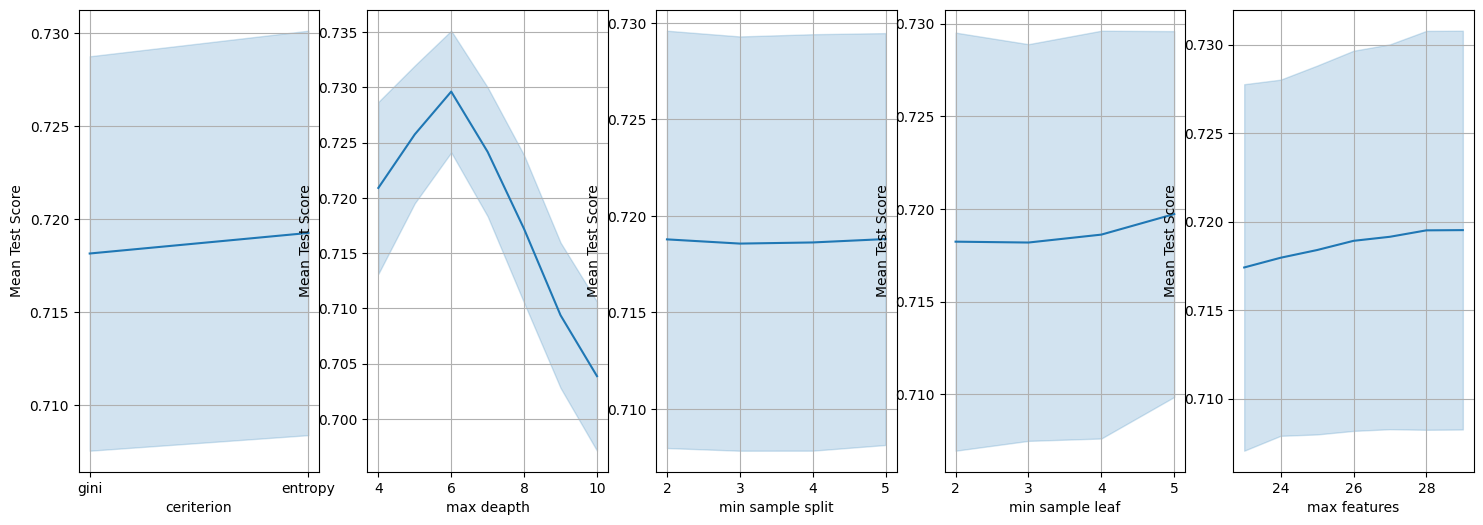

In [418]:
cv_results_df = pd.concat(cv_results_df, ignore_index=True)

plt.figure(figsize=(18, 6))


plt.subplot(1, 5, 1)
sb.lineplot(data=cv_results_df, x='param_classifier__criterion', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('ceriterion')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 5, 2)
sb.lineplot(data=cv_results_df, x='param_classifier__max_depth', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('max deapth')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 5, 3)
sb.lineplot(data=cv_results_df, x='param_classifier__min_samples_split', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('min sample split')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 5, 4)
sb.lineplot(data=cv_results_df, x='param_classifier__min_samples_leaf', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('min sample leaf')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 5, 5)
sb.lineplot(data=cv_results_df, x='param_classifier__max_features', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('max features')
plt.ylabel('Mean Test Score')
plt.grid()

the mest model: RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=90) 


In [338]:
print(best_models_decision_tree_pipe)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
                              

In [339]:
drbest = pipe_normalized_pca(DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=26, min_samples_leaf=4))
evaluate(drbest.fit(train_val_features, train_val_targets), test_features, test_targets)

{'accuracy': 0.7615819209039548,
 'precision': 0.740442647395671,
 'recall': 0.7615819209039548,
 'f1': 0.7416474422064471,
 'roc_auc': 0.8582117968154023}

# random forst with altered data: scaled, balanced and pca

In [384]:
rfc_params = {
        'classifier__n_estimators': [90, 100, 110, 120],
        'classifier__criterion': ['log_loss', 'entropy', 'gini'],
        'classifier__max_depth': [10, 13, 16, 19, 21],
        'classifier__min_samples_split': [2, 4, 6, 8]

    }
best_models_rfc_pipe_balanced, cv_results, model_scores_dt = find_best_models(pipe_normalized_pca_balanced(RandomForestClassifier(n_jobs=-1)), rfc_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


I didn't try more n_estimators because the score didn't improve much with additional trees. Max_depth stabilized after 14 and stayed the same, while min_samples_split remained stable overall but started to get worse toward the end of the range.

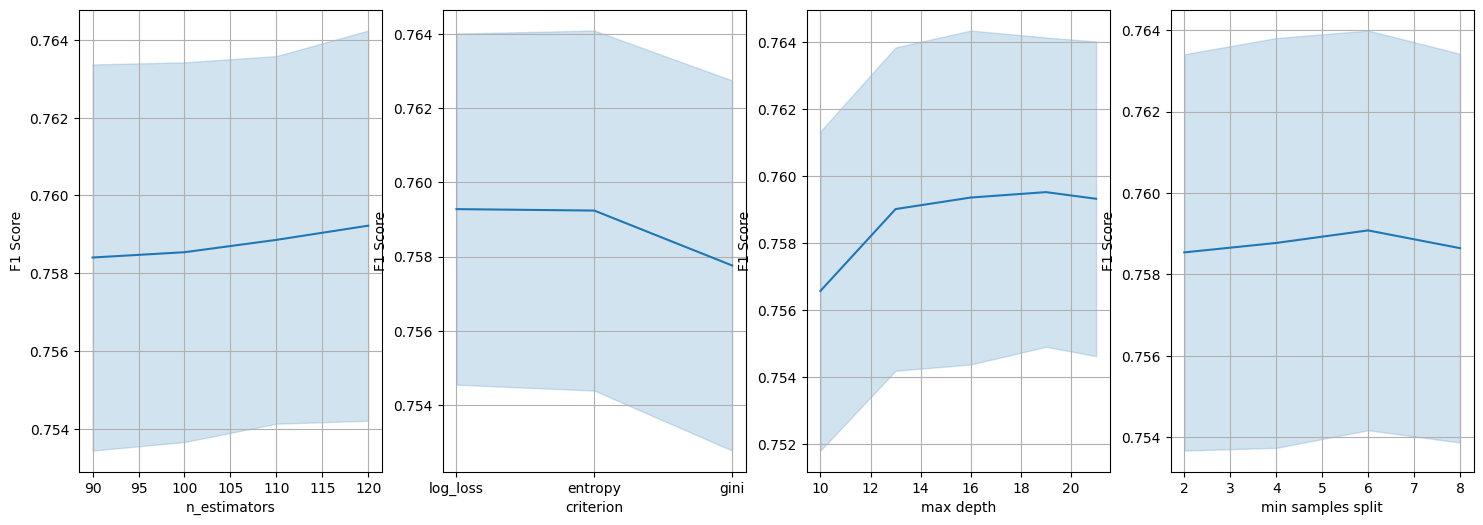

In [396]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
sb.lineplot(data=cv_results_df, x='param_classifier__n_estimators', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.grid()

plt.subplot(1, 4, 2)
sb.lineplot(data=cv_results_df, x='param_classifier__criterion', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('criterion')
plt.ylabel('F1 Score')
plt.grid()

plt.subplot(1, 4, 3)
sb.lineplot(data=cv_results_df, x='param_classifier__max_depth', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('max depth')
plt.ylabel('F1 Score')
plt.grid()

plt.subplot(1, 4, 4)
sb.lineplot(data=cv_results_df, x='param_classifier__min_samples_split', y='mean_test_f1_weighted', estimator='mean', errorbar='sd')
plt.xlabel('min samples split')
plt.ylabel('F1 Score')
plt.grid()

finding the best model: this result is more mixed then the other ones, but overall it looks like max depth of 4 is most occuring, if not it is a number close. and default min sample split and criterion is most occuring also.

In [386]:
print(best_models_rfc_pipe_balanced)

[Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca2', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca3', PCA(n_components=1),
                                                  [21, 27]),
                                                 ('pca4', PCA(n_components=1),
                                                  [22, 28]),
                                                 ('pca5', PCA(n_components=1),
                                                  [23, 29]),
                                                 ('pca6', PCA(n_components=1),
                                                  [24, 30]),
          

# evaluating the classifiers after round two


# the five best models of each model types scores

In [403]:
print("Decision tree with altered data: scaled and pca")
print(model_scores_df)
print("random forst with altered data: scaled, balanced and pca")
print(model_scores)

Decision tree with altered data: scaled and pca
{'accuracy': [0.7711864406779662, 0.7556497175141242, 0.7641242937853108, 0.7584745762711864, 0.7340876944837341], 'precision': [0.7584433865293765, 0.7422409657818995, 0.7575565226573773, 0.7391296500051534, 0.7187557596587861], 'recall': [0.7711864406779662, 0.7556497175141242, 0.7641242937853108, 0.7584745762711864, 0.7340876944837341], 'f1': [0.7565585904949378, 0.7417552686829364, 0.7475189877686318, 0.7364738899737672, 0.7226493578383767], 'roc_auc': [0.8594524639842511, 0.848225008242054, 0.8464980331177054, 0.8402659597102046, 0.8205103903182929]}
random forst with altered data: scaled, balanced and pca
{'accuracy': [0.7796610169491526, 0.768361581920904, 0.7711864406779662, 0.7810734463276836, 0.7666195190947667], 'precision': [0.7733786341470852, 0.7627986185189577, 0.7711104303296141, 0.7787813494770178, 0.7634540019001828], 'recall': [0.7796610169491526, 0.768361581920904, 0.7711864406779662, 0.7810734463276836, 0.766619519094

# the scores of the best models of each model type

In [412]:
print("Decision tree with altered data: scaled and pca ")
drbest = pipe_normalized_pca(DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=27, min_samples_leaf=4,
                                        min_samples_split=4)).fit(train_val_features, train_val_targets)
print(evaluate(drbest, test_features, test_targets))
print()
print("random forst with altered data: scaled, balanced and pca")
dftbest = pipe_normalized_pca_balanced(RandomForestClassifier(criterion='entropy', max_depth=16,
                                        min_samples_split=6)).fit(train_val_features, train_val_targets)
print(evaluate(dftbest, test_features, test_targets))



Decision tree with altered data: scaled and pca 
{'accuracy': 0.7604519774011299, 'precision': 0.740161779462499, 'recall': 0.7604519774011299, 'f1': 0.7423178866977497, 'roc_auc': 0.8548588083319553}

random forst with altered data: scaled, balanced and pca
{'accuracy': 0.7785310734463277, 'precision': 0.7753777675000898, 'recall': 0.7785310734463277, 'f1': 0.7747306403290771, 'roc_auc': 0.8864709700779461}


# Visuallizing the results
category 0: Dropout
category 1: Enrolled
category 2: Graduate

# Decision tree with altered data: scaled and pca

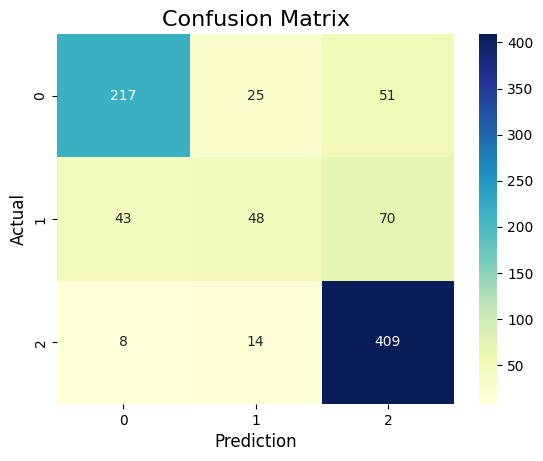

In [408]:
y_pred = drbest.predict(test_features)
cm = confusion_matrix(test_targets, y_pred)

sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Random forest with altered data: scaled, balanced and pca

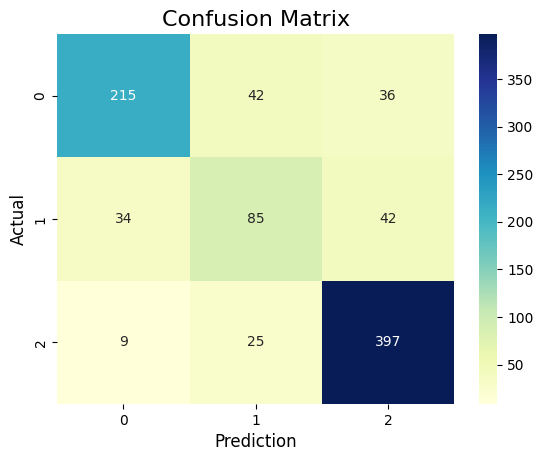

In [411]:
y_pred = dftbest.predict(test_features)
cm = confusion_matrix(test_targets, y_pred)

sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Conclusion


metric results of round one:  
Many of the models produced similar results, but the Decision Tree Regressor had a slightly higher score. This outcome is not surprising, as Decision Trees are highly versatile models. They excel at identifying patterns and capturing non-linear relationships, which may be a key characteristic of this dataset  
Additionally, the Random Forest Regressor achieved an even slightly better score. This makes sense because Random Forests are ensembles of Decision Trees, combining their strengths while reducing overfitting through averaging.  
We also observed that the alterations to the dataset had varying impacts on the performance of the models tested. Some models performed better with the alterations, while others showed worse results. This could be because different models have varying sensitivities to the structure and quality of the data. Testing different datasets was a smart approach because it allowed me to identify the dataset modifications that worked best for each model, ensuring that the preprocessing aligns with the strengths of the algorithms.

scores of the five best models of each model type from round 2:  
Almost all of the scores were higher for the Random Forest Regressor, suggesting that, on average, it performs better than the Decision Tree. This aligns with expectations, as Random Forests combine multiple Decision Trees to improve accuracy and reduce overfitting.

metric results of the best models round two:  
Random Forest performed better than the Decision Tree in terms of accuracy, precision, recall, and ROC AUC.


Confusion matrix:  
Decision tree regressor:  
Here, we can visually observe how the models predicted the different categories. Among the students who dropped out, 217 were correctly predicted as dropouts, 43 were misclassified as enrolled, and 8 were misclassified as graduated. For the enrolled students, 48 were correctly predicted as enrolled, 25 were misclassified as dropouts, and 14 were misclassified as graduated. For the graduate students, 409 were correctly predicted as graduates, 70 were misclassified as enrolled, and 51 were misclassified as dropouts. From these results, we can see that the model generally predicts correctly, but it had some difficulty distinguishing between enrolled and dropout students, as well as between enrolled and graduate students. This suggests that the features used in the model might not provide enough separation between these categories
  
Random forest regressor:(This one is also oversampeled and has made more predictions)  
Here, we can visually observe how the models predicted the different categories. Among the students who dropped out, 215 were correctly predicted as dropouts, 34 were misclassified as enrolled, and 9 were misclassified as graduated. For the enrolled students, 85 were correctly predicted as enrolled, 42 were misclassified as dropouts, and 25 were misclassified as graduated. For the graduate students, 397 were correctly predicted as graduates, 42 were misclassified as enrolled, and 36 were misclassified as dropouts. This also  had difficulty distinguishing between enrolled and dropout students, as well as between enrolled and graduate students, 
  
Overall, the Random Forest Regressor predicted more correctly compared to the Decision Tree Regressor. The oversampling likely contributed to this improvement, as it made the model more sensitive to the minority classes, helping it better distinguish between categories
  
The best model:  
Random forest with altered data: scaled, balanced and pca. This is the best model because it clearly had better metrics and better predictions.
  
  
Things to consider:  
Hyperparameter Search Space: While we tuned the models using specific parameters, there could still be better configurations beyond the range we tested. Exploring a larger search space might uncover new peaks, leading to improved model performance. it was hard testing a very wide range of paramters without getting a too high run time, so i tested different intervals until i found an appropriate one.
    
Small differences in results: The models didn’t show huge differences in their performance, so it’s possible that with a different test set or dataset, we might see a different "best" model. This just means that the results might vary depending on the data we’re working with.



# Sources

Scikit-learn Documentation: Pipeline
Scikit-learn. (2024). Pipeline. Retrieved from https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html
  
Scikit-learn Documentation: ColumnTransformer
Scikit-learn. (2024). ColumnTransformer. Retrieved from https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html
  
Scikit-learn Documentation: RandomForestClassifier
Scikit-learn. (2024). RandomForestClassifier. Retrieved from https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  
Scikit-learn Documentation: BernoulliNB
Scikit-learn. (2024). BernoulliNB. Retrieved from https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.BernoulliNB.html
  
Scikit-learn Documentation: StandardScaler
Scikit-learn. (2024). StandardScaler. Retrieved from https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html
  
Medium Article: Introduction to Machine Learning Pipelines
Jang, C. (2020, November 17). Introduction to machine learning pipelines. Medium. Retrieved from https://medium.com/@cezinejang/introduction-to-machine-learning-pipelines-adb041120856
  
StackOverflow: Precision Calculation Warning
StackOverflow. (2020, May 13). Precision calculation warning when using GridSearchCV for logistic regression. Retrieved from https://stackoverflow.com/questions/66538197/precision-calculation-warning-when-using-gridsearchcv-for-logistic-regression
  
Medium Article: Evaluating Multi-Class Classification Model Using Confusion Matrix in Python
Sanya, G. (2021, February 17). Evaluating multi-class classification model using confusion matrix in Python. Medium. Retrieved from https://medium.com/@gubrani.sanya2/evaluating-multi-class-classification-model-using-confusion-matrix-in-python-4d9344084dfa
  
Scikit-learn. (2024). RandomForestClassifier. Retrieved from https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  
Scikit-learn. (2024). GridSearchCV. Retrieved from https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html
